# Baseline

In [21]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [23]:
# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [24]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [25]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [28]:
import torch
import torch.nn as nn
input = torch.Tensor(1, 10, 12, 12)
conv1 = nn.Conv2d(10, 20, 5)
pool = nn.MaxPool2d(2)
out = conv1(input)
out2 = pool(out)
print(out.size())
print(out2.size())


torch.Size([1, 20, 8, 8])
torch.Size([1, 20, 4, 4])


In [27]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.build_net()
    
  def build_net(self):
    self.layer1 = nn.Sequential(
          nn.Conv2d( 1, 10, kernel_size = 5),  # (in_channels, out_channels, kernel_size, padding = 0 디폴트) 
          nn.MaxPool2d(2),
          nn.ReLU())
    
    # L1 input [? , 1, 28, 28]
    #    conv [? , 10, 24, 24]
    #    pool [?, 10, 12, 12]
    
    self.layer2 = nn.Sequential(
          nn.Conv2d( 10, 20, kernel_size = 5),  # (in_channels, out_channels, kernel_size) 
          nn.MaxPool2d(2),
          nn.ReLU())
    
    # L2 input [? , 10, 12, 12]
    #    conv [? , 20, 8, 8]
    #    pool [?,  20, 4, 4]
    self.fc = nn.Linear( 4 * 4 * 20 , 10) ## flatten ?
  

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc(out)
    return F.log_softmax(out)
  

In [29]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum =0.01)

In [31]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      



In [32]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    losses=[]
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data #  CrossEntropyLoss 안에는 LogSoftmax + NLLLoss
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        losses.append(test_loss.item())

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    plt.plot(losses)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.317942
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.301900
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.289004
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.287441
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.268823
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.250827
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.241482
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.211370
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.181328
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.164700
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.145507
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.106022
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.025048
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.008511
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.915293
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.864161
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.819561
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.591042
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.504868
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.420964
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2713, Accuracy: 9152/10000 (92%)



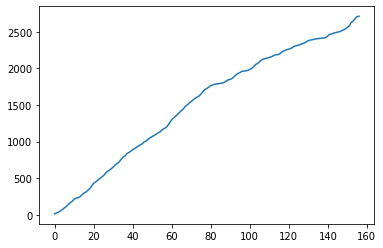

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.218100
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.312545
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.214160
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.233822
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.177048
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.193358
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.227013
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.255930
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.259946
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.356209
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.280253
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.183046
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.318685
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.228277
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.281619
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.221494
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.275449
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.155398
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.218550
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.215604
Train Epoch: 2 [12800/60000 (

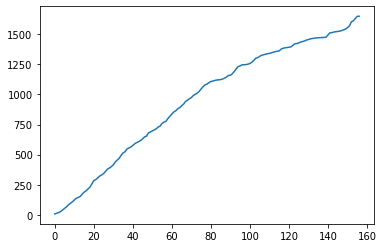

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.126829
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.108318
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.202911
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.180762
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.102841
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.196885
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.256208
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.263610
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.127771
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.244720
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.264144
Train Epoch: 3 [7040/60000 (12%)]	Loss: 0.199508
Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.217778
Train Epoch: 3 [8320/60000 (14%)]	Loss: 0.159099
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.158899
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.106451
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.294226
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.213552
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.145534
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.206015
Train Epoch: 3 [12800/60000 (

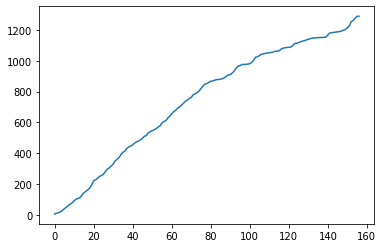

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.179938
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.190525
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.161239
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.123518
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.100230
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.203017
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.203300
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.211397
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.124752
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.169621
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.094039
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.161520
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.259078
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.101374
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.127566
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.168934
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.088619
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.077897
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.180616
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.364896
Train Epoch: 4 [12800/60000 (

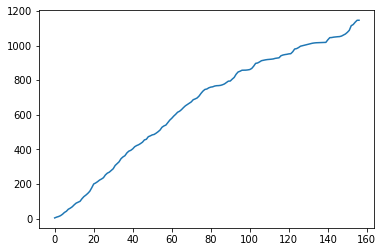

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.071365
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.095721
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.142136
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.089156
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.103307
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.077622
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.083125
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.045576
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.195227
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.091764
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.074129
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.063463
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.205254
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.053074
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.264960
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.198835
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.051098
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.126386
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.096395
Train Epoch: 5 [12160/60000 (20%)]	Loss: 0.136893
Train Epoch: 5 [12800/60000 (

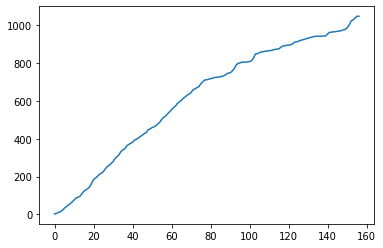

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.101508
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.031974
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.167392
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.109910
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.057352
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.168958
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.069790
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.176729
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.135193
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.055900
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.133822
Train Epoch: 6 [7040/60000 (12%)]	Loss: 0.047947
Train Epoch: 6 [7680/60000 (13%)]	Loss: 0.043835
Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.029931
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.031611
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.150798
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.035095
Train Epoch: 6 [10880/60000 (18%)]	Loss: 0.107266
Train Epoch: 6 [11520/60000 (19%)]	Loss: 0.261660
Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.053795
Train Epoch: 6 [12800/60000 (

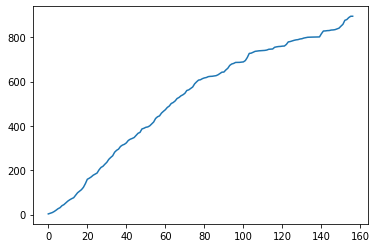

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.131353
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.138648
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.026109
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.135592
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.072115
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.208280
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.118307
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.020154
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.155751
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.228211
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.044995
Train Epoch: 7 [7040/60000 (12%)]	Loss: 0.237274
Train Epoch: 7 [7680/60000 (13%)]	Loss: 0.133345
Train Epoch: 7 [8320/60000 (14%)]	Loss: 0.073427
Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.061208
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.068674
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.054487
Train Epoch: 7 [10880/60000 (18%)]	Loss: 0.084842
Train Epoch: 7 [11520/60000 (19%)]	Loss: 0.079993
Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.036496
Train Epoch: 7 [12800/60000 (

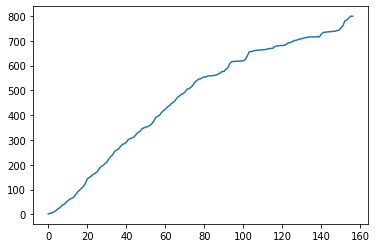

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.050510
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.072787
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.049360
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.036282
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.062786
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.170222
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.052689
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.170722
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.019015
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.270784
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.212065
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.183567
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.187342
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.114929
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.091784
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.038992
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.059575
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.034316
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.033676
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.081837
Train Epoch: 8 [12800/60000 (

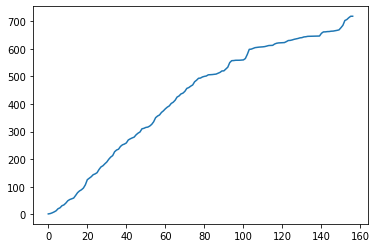

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.056154
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.093567
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.197655
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.050738
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.090414
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.016504
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.173684
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.060375
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.116402
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.036004
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.116672
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.366278
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.107590
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.024673
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.075477
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.049627
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.216230
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.075031
Train Epoch: 9 [11520/60000 (19%)]	Loss: 0.067785
Train Epoch: 9 [12160/60000 (20%)]	Loss: 0.044880
Train Epoch: 9 [12800/60000 (

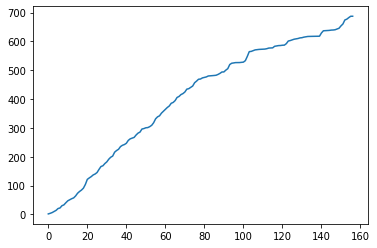

In [33]:
for epoch in range(1, 10):
    train(epoch)
    test()

In [ ]:
# 그래프 왜저러지

## Task 1 : 
위 베이스라인 구조를 아래와 같은 형태로 변경 + MNIST 데이터셋 (위 베이스라인에서 사용한 데이터셋)

In [50]:
input = torch.Tensor(1, 64, 7, 7)
conv1 = nn.Conv2d(64, 128, (3,3), stride=1, padding=1)
pool = nn.MaxPool2d((2,2), stride=2, padding =1)
out = conv1(input)
out2 = pool(out)
print(out.size() ,'-->',out2.size())

torch.Size([1, 128, 7, 7]) --> torch.Size([1, 128, 4, 4])


In [51]:
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.build_net()
    
    
  def build_net(self):
        self.layer1 = nn.Sequential(
          nn.Conv2d( 1, 32, kernel_size = 3, stride=1, padding=1),  # (in_channels, out_channels, kernel_size, padding = 0 디폴트) 
          nn.MaxPool2d(2, stride=2),
          nn.ReLU())
    
        # L1 input [? , 1, 28, 28]
        #    conv [? , 32, 28, 28]
        #    pool [?, 32, 14, 14]
    
        self.layer2 = nn.Sequential(
          nn.Conv2d( 32, 64, kernel_size = 3, stride=1, padding=1),  # (in_channels, out_channels, kernel_size) 
          nn.MaxPool2d(2, stride=2),
          nn.ReLU())
      
        # L2 input [? , 32, 14, 14]
        #    conv [? , 64, 14, 14]
        #    pool [?,  64, 7, 7]
        
        self.layer3 = nn.Sequential(
          nn.Conv2d( 64, 128, kernel_size = 3, stride=1, padding=1),  # (in_channels, out_channels, kernel_size) 
          nn.MaxPool2d(2, stride=2, padding=1),
          nn.ReLU())
      
        # L3 input [? , 64, 7, 7]
        #    conv [? , 128, 7, 7]
        #    pool [?,  128, 4, 4]
  
        self.fc1 = nn.Linear( 4 * 4 * 128 , 100, bias = True) ## flatten ?
        self.fc2 = nn.Linear( 100 , 10,  bias = True)
  


  def forward(self, x):
        
    out = self.layer1(x)  # [1, 28, 28] -> [32, 14, 14]
    out = self.layer2(out)  # [32, 14, 14]-> [64, 7, 7]
    out = self.layer3(out) # [64, 7, 7] -> [128, 4, 4]
    out = out.view(out.size(0), -1) 
    out = self.fc1(out)
    out = self.fc2(out)
    return F.log_softmax(out)
    
  ###############################


In [52]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    losses =[]
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        losses.append(test_loss.item())

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    plt.plot(losses)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301020
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.312746
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.299970
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.302749
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.297046
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.291880
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.292746
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.301770
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.298728
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.287340
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.294344
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.293541
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.286690
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.285560
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.277334
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.285328
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.273060
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.277130
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.263463
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.263537
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2086, Accuracy: 9353/10000 (94%)



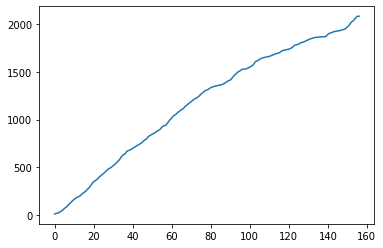

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.138261
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.332844
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.351261
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.344724
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.276132
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.279260
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.165798
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.261126
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.137011
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.250583
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.149885
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.084485
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.103583
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.217432
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.215174
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.157295
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.161529
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.180237
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.178122
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.190660
Train Epoch: 2 [12800/60000 (

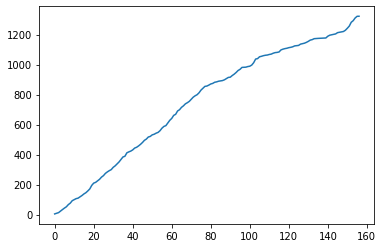

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.070517
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.061757
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.116489
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.076307
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.166241
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.059824
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.114425
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.257016
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.264666
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.075648
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.187862
Train Epoch: 3 [7040/60000 (12%)]	Loss: 0.081881
Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.110004
Train Epoch: 3 [8320/60000 (14%)]	Loss: 0.228404
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.212363
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.238249
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.053207
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.065483
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.114979
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.105532
Train Epoch: 3 [12800/60000 (

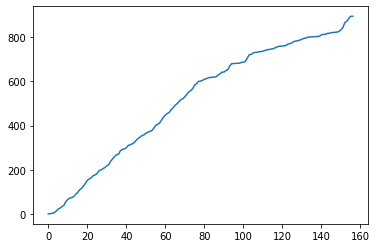

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.155364
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.044283
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.061154
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.075047
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.124085
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.076115
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.063534
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.066405
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.105216
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.089089
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.074115
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.086612
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.058507
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.039944
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.099157
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.090108
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.096366
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.095746
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.106187
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.099813
Train Epoch: 4 [12800/60000 (

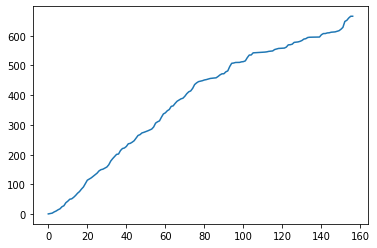

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.078705
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.083431
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.113229
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.031504
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.025966
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.183981
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.094082
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.129395
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.020495
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.037739
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.116792
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.033623
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.039116
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.077689
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.031254
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.025896
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.028363
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.142106
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.024346
Train Epoch: 5 [12160/60000 (20%)]	Loss: 0.105248
Train Epoch: 5 [12800/60000 (

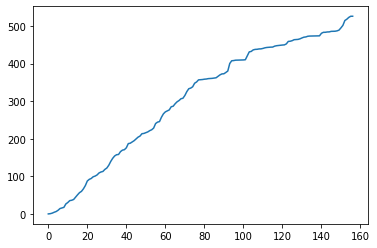

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.019565
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.018414
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.078175
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.055229
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.060535
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.032366
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.053319
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.030199
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.047646
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.037483
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.015069
Train Epoch: 6 [7040/60000 (12%)]	Loss: 0.045261
Train Epoch: 6 [7680/60000 (13%)]	Loss: 0.075973
Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.061082
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.107946
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.084448
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.104501
Train Epoch: 6 [10880/60000 (18%)]	Loss: 0.021333
Train Epoch: 6 [11520/60000 (19%)]	Loss: 0.021731
Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.059489
Train Epoch: 6 [12800/60000 (

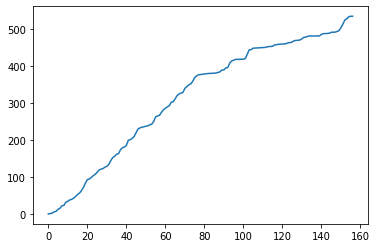

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.077559
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.015029
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.056938
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.043115
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.140060
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.031935
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.085889
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.117713
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.114427
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.073016
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.032449
Train Epoch: 7 [7040/60000 (12%)]	Loss: 0.061319
Train Epoch: 7 [7680/60000 (13%)]	Loss: 0.048173
Train Epoch: 7 [8320/60000 (14%)]	Loss: 0.018917
Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.023012
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.083115
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.014193
Train Epoch: 7 [10880/60000 (18%)]	Loss: 0.028249
Train Epoch: 7 [11520/60000 (19%)]	Loss: 0.029396
Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.022342
Train Epoch: 7 [12800/60000 (

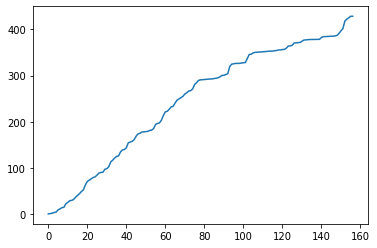

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.058704
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.081800
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.007662
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.031650
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.032327
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.021156
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.015069
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.009146
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.018099
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.120655
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.053330
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.012585
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.013913
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.035992
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.033026
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.007197
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.104520
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.220741
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.018486
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.006665
Train Epoch: 8 [12800/60000 (

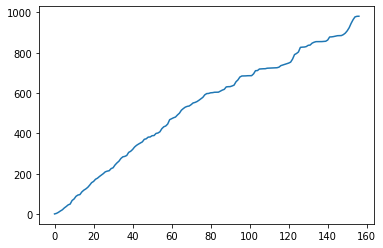

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.104219
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.015526
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.043476
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.037019
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.003376
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.043325
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.053148
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.155703
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.062785
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.027551
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.052118
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.008362
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.046305
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.234184
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.004754
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.075334
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.024599
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.012639
Train Epoch: 9 [11520/60000 (19%)]	Loss: 0.018527
Train Epoch: 9 [12160/60000 (20%)]	Loss: 0.020313
Train Epoch: 9 [12800/60000 (

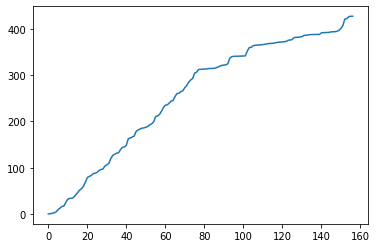

In [53]:
for epoch in range(1, 10):
    train(epoch)  
    test()

# Task 2 : 
베이스라인 마음대로 변경 + Softmax regression 과제에서  사용했던 데이터셋 (변경 가능하나 같은 데이터셋으로 진행하시는 걸 추천드립니다!) >> CNN으로 성공해보자!

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시 부탁드립니다!

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가 등 연산 효율성도 고려해서 베이스라인 조정해보세요!

1. 라이브러리 호출

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import warnings
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

%matplotlib inline

- GPU 사용가능한지 확인

In [62]:
# 만약 GPU를 사용 가능하다면 device 값이 cuda가 되고, 아니라면 cpu가 됨
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 랜덤 시드 고정
torch.manual_seed(777)
# GPU 사용 가능일 경우 랜덤 시드 고정
if device == "cuda":
  torch.cuda.manual_seed_all(777)

- 학습에 사용할 파라미터를 설정

In [63]:
lr = 0.01
epochs = 10
batch_size = 256
keep_prob = 0.5

2. 데이터 불러오기 및 transform 선언

In [64]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',  # 다운로드 경로 지정
                               train=True,  # train으로 다운로드
                               transform=transforms.ToTensor(), # 텐서로 변환
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())


3. 미니 배치 적용

In [66]:
# 데이터로더를 사용하여 데이터를 다루기 위해서 데이터셋을 정의해준다 ############## https://wikidocs.net/55580
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)  #  Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿈

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

4. 모델 생성


In [65]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.build_net()
    
    
  def build_net(self):
    self.layer1 = nn.Sequential(
          nn.Conv2d( 1, 10, kernel_size = 5),  # (in_channels, out_channels, kernel_size, padding = 0 디폴트) 
          nn.MaxPool2d(2),
          nn.ReLU(),
          nn.Dropout(p=1-keep_prob))
    
    self.layer2 = nn.Sequential(
          nn.Conv2d( 10, 20, kernel_size = 5),  # (in_channels, out_channels, kernel_size) 
          nn.MaxPool2d(2),
          nn.ReLU(),
          nn.Dropout(p=0.5))
  
    self.fc1 = nn.Linear( 4 * 4 * 20 , 100) ## flatten ?
    nn.init.xavier_uniform(self.fc1.weight)
    
    self.layer3 = nn.Sequential(
          self.fc1,
          nn.ReLU(),
          nn.Dropout(p=1-keep_prob))
    
    self.fc2 = nn.Linear(100, 10, bias=True)
    
    self.criterion = nn.CrossEntropyLoss()    # Softmax is internally computed.
  
        
  def forward(self, x):
    out = self.layer1(x)  # 28 * 28 * 10
    out = self.layer2(out)
    out = out.view(out.size(0), -1) # 일반 신경망에 넣기위해서는 벡터 형태를 가져야하므로, view를 통해 벡터의 형태로 바꾸어준다.
    out = self.fc1(out)
    out = F.dropout(out, training=self.training)
    out = self.fc2(out)
    return out



In [67]:
model = CNN()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


5. 손실함수, 최적화 함수

In [68]:
criterion = nn.CrossEntropyLoss()
adam = optim.Adam(model.parameters(),lr=lr)

lr = 0.01
batch_size = 256

6. train, test 함수


In [69]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    losses =[]
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        losses.append(test_loss.item())

    test_loss /= len(test_loader.dataset)
    print("#"*30)
    print("epoch :",epochs, "\nbatch_size :",batch_size ,"\nlearning rate :",lr,"\noptimizer : adam","\ndrop_out :" ,keep_prob)
  
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    plt.plot(losses)
    plt.show()

loss가 이상

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


Train Epoch: 1 [0/60000 (0%)]	Loss: -0.004946
Train Epoch: 1 [2560/60000 (4%)]	Loss: -0.077039
Train Epoch: 1 [5120/60000 (9%)]	Loss: -0.085025
Train Epoch: 1 [7680/60000 (13%)]	Loss: -0.026371
Train Epoch: 1 [10240/60000 (17%)]	Loss: -0.064731
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.049444
Train Epoch: 1 [15360/60000 (26%)]	Loss: -0.053380
Train Epoch: 1 [17920/60000 (30%)]	Loss: -0.020564
Train Epoch: 1 [20480/60000 (34%)]	Loss: -0.044246
Train Epoch: 1 [23040/60000 (38%)]	Loss: -0.043747
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.115694
Train Epoch: 1 [28160/60000 (47%)]	Loss: -0.043612
Train Epoch: 1 [30720/60000 (51%)]	Loss: -0.112626
Train Epoch: 1 [33280/60000 (55%)]	Loss: -0.070203
Train Epoch: 1 [35840/60000 (60%)]	Loss: -0.090296
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.094861
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.024791
Train Epoch: 1 [43520/60000 (72%)]	Loss: -0.058151
Train Epoch: 1 [46080/60000 (77%)]	Loss: -0.090741
Train Epoch: 1 [48640/60000 (81%)]	Loss: -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


##############################
epoch : 10 
batch_size : 256 
learning rate : 0.01 
optimizer : adam 
drop_out : 0.2

Test set: Average loss: -0.0250, Accuracy: 1208/10000 (12%)



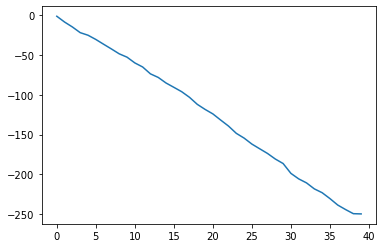

Train Epoch: 2 [0/60000 (0%)]	Loss: -0.115736
Train Epoch: 2 [2560/60000 (4%)]	Loss: -0.025031
Train Epoch: 2 [5120/60000 (9%)]	Loss: -0.052005
Train Epoch: 2 [7680/60000 (13%)]	Loss: -0.103805
Train Epoch: 2 [10240/60000 (17%)]	Loss: -0.022982
Train Epoch: 2 [12800/60000 (21%)]	Loss: -0.104039
Train Epoch: 2 [15360/60000 (26%)]	Loss: -0.119491
Train Epoch: 2 [17920/60000 (30%)]	Loss: -0.001564
Train Epoch: 2 [20480/60000 (34%)]	Loss: -0.154183
Train Epoch: 2 [23040/60000 (38%)]	Loss: -0.002385
Train Epoch: 2 [25600/60000 (43%)]	Loss: -0.017689
Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.026628
Train Epoch: 2 [30720/60000 (51%)]	Loss: -0.008975
Train Epoch: 2 [33280/60000 (55%)]	Loss: -0.084021
Train Epoch: 2 [35840/60000 (60%)]	Loss: -0.043626
Train Epoch: 2 [38400/60000 (64%)]	Loss: -0.056740
Train Epoch: 2 [40960/60000 (68%)]	Loss: -0.026258
Train Epoch: 2 [43520/60000 (72%)]	Loss: -0.015458


KeyboardInterrupt: ignored

In [70]:
for i in [0.2,0.5,0.7]:
  keep_prob = i
  model = CNN()
  for epoch in range(1, 10):
    train(epoch)  
    test()

함수 만들다가 

In [36]:
def train_model (model, epochs, batch_size ,learning_rate, optimizer, keep_prob):
    
  epochs = epochs
  train_losses = []
  test_losses =[]
  train_acc =[]
  test_acc = []
  n_train = len(train_loader)*batch_size
  n_test = len(test_loader)*batch_size


  for i in range(epochs):
    total_loss = 0
    total_acc = 0
    c = 0
    for b, (images,labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)
      
      optimizer.zero_grad()
      hypothesis = model(images)
      loss = criterion(hypothesis,labels)
      loss.backward()
      optimizer.step()
      
      total_loss+=loss.item()
      total_acc+=torch.sum(torch.max(hypothesis,dim=1)[1]==labels).item()*1.0    
      c+=1

      if b % 600 == 0:
            print(f'epochs : {i} batch {b} loss {loss.item()}')
          

    train_losses.append(total_loss/n_train)
    train_acc.append(total_acc/n_train)

  print("Training complete")


  fig, ax = plt.subplots(nrows=1, ncols=2)
  ax[0].plot(train_losses, 'r',label="Train")
  ax[0].set_ylabel("Error (cross-entropy)")
  ax[0].set_xlabel("Epoch")
  ax[0].legend()
  ax[1].plot(train_acc, 'r',label="Train")
  ax[1].set_ylabel("Accuracy")
  ax[1].set_xlabel("Epoch")
  ax[1].legend()
  plt.show()

  


In [19]:
def test_model(model ,epochs, batch_size ,lr, opt, keep_prob ):
  total_acc = 0
  for images,labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = model(images)
    total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0

  print("#"*30)
  print("epoch :",epochs, "\nbatch_size :",batch_size ,"\nlearning rate :",lr,"\noptimizer :", opt,"\ndrop_out :" ,keep_prob)
  print("Test accuracy :",total_acc/len(test_loader.dataset))

  


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 0.01 0.3
epochs : 0 batch 0 loss 2.3210065364837646


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


epochs : 0 batch 600 loss 2.3209402561187744
epochs : 1 batch 0 loss 2.299492120742798
epochs : 1 batch 600 loss 2.4261507987976074
epochs : 2 batch 0 loss 2.483823537826538
epochs : 2 batch 600 loss 2.351008176803589
epochs : 3 batch 0 loss 2.444070816040039
epochs : 3 batch 600 loss 2.380915403366089
epochs : 4 batch 0 loss 2.3343656063079834
epochs : 4 batch 600 loss 2.360943555831909
epochs : 5 batch 0 loss 2.3501691818237305
epochs : 5 batch 600 loss 2.37571120262146
epochs : 6 batch 0 loss 2.3486032485961914
epochs : 6 batch 600 loss 2.328136920928955
epochs : 7 batch 0 loss 2.363377809524536
epochs : 7 batch 600 loss 2.40462327003479
epochs : 8 batch 0 loss 2.3444321155548096
epochs : 8 batch 600 loss 2.381915807723999
epochs : 9 batch 0 loss 2.3040714263916016
epochs : 9 batch 600 loss 2.327937602996826
epochs : 10 batch 0 loss 2.372332811355591
epochs : 10 batch 600 loss 2.506929636001587
epochs : 11 batch 0 loss 2.312260866165161
epochs : 11 batch 600 loss 2.446817636489868
e

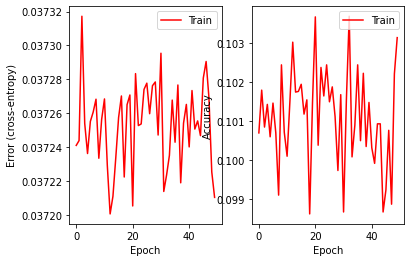

##############################
epoch : 50 
batch_size : 64 
learning rate : 0.01 
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 
drop_out : 0.3
Test accuracy : 0.0991
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 0.01 0.5
epochs : 0 batch 0 loss 2.3981807231903076
epochs : 0 batch 600 loss 2.346689462661743
epochs : 1 batch 0 loss 2.2851574420928955
epochs : 1 batch 600 loss 2.4233505725860596
epochs : 2 batch 0 loss 2.303677797317505
epochs : 2 batch 600 loss 2.3284263610839844
epochs : 3 batch 0 loss 2.3676891326904297
epochs : 3 batch 600 loss 2.344413995742798
epochs : 4 batch 0 loss 2.3185136318206787
epochs : 4 batch 600 loss 2.3280723094940186
epochs : 5 batch 0 loss 2.3702614307403564
epochs : 5 batch 600

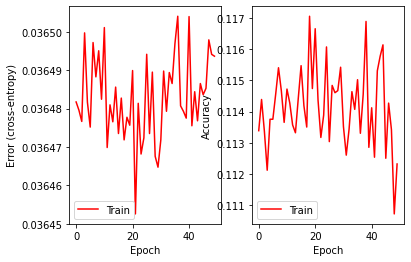

##############################
epoch : 50 
batch_size : 64 
learning rate : 0.01 
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 
drop_out : 0.5
Test accuracy : 0.1144
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 0.01 0.8
epochs : 0 batch 0 loss 2.337003707885742
epochs : 0 batch 600 loss 2.3569319248199463
epochs : 1 batch 0 loss 2.36683988571167
epochs : 1 batch 600 loss 2.28652024269104
epochs : 2 batch 0 loss 2.337496519088745
epochs : 2 batch 600 loss 2.3080592155456543
epochs : 3 batch 0 loss 2.3535239696502686
epochs : 3 batch 600 loss 2.3691768646240234
epochs : 4 batch 0 loss 2.3422796726226807
epochs : 4 batch 600 loss 2.4000747203826904
epochs : 5 batch 0 loss 2.3915398120880127
epochs : 5 batch 600 lo

KeyboardInterrupt: ignored

In [45]:

for keep_prob in keep_probs:
  print("optimizer : Adam ", "learning rate :",lr, "drop out :",keep_prob)
  model = CNN()
  train_model (model, epochs, batch_size ,lr, adam, keep_prob)
  test_model(model, epochs, batch_size ,lr, adam, keep_prob)
      


In [ ]:
# https://velog.io/@yookyungkho/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98-%EA%B3%A0%EC%A7%88%EB%B3%91-Overfitting%EA%B3%BC%EC%A0%81%ED%95%A9-%ED%95%B4%EA%B2%B0-%ED%8C%81